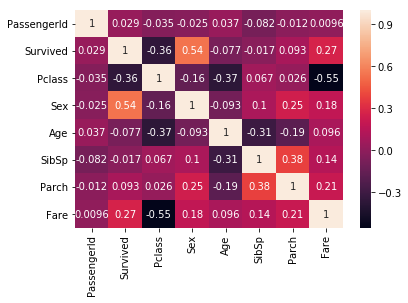

In [95]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datasetPath = os.getcwd().rsplit('/',1)[0] + '/dataset'
trainFile = datasetPath + '/train.csv'
testFile = datasetPath + '/test.csv'
dfTrain = pd.read_csv(trainFile)
dfTest  = pd.read_csv(testFile)
dfFull  = dfTrain.append(dfTest, ignore_index=True)

datasetFull = dfFull.as_matrix()
dataset = dfTrain.as_matrix()

# Get the columns of the dataset as numpy arrays.
dshape = np.shape(dataset)
survived = dataset[:,1]
pclass = dataset[:,2]
gender = dataset[:,4]
age = dataset[:,5]
numSibSp = dataset[:,6]
numParCh = dataset[:,7]
ticketNum = dataset[:,8]
fare = dataset[:,9]
cabin = dataset[:,10]
embarkation = dataset[:,11]

# NaN % among age values.
numAgeNan = np.count_nonzero(pd.isnull(age))
numAgeNanPerc = float(numAgeNan) / float(age.size) * 100
#print(numAgeNanPerc)

#### Dropping the rows of train dataframe where NaNs exist.

# Taking the rows of dfTrain where valid age numbers exist.
dfTrain1 = dfTrain[np.isfinite(dfTrain['Age'])]
dataset1 = dfTrain1.as_matrix()

# Get parametric information of the columns.
isMale = (dfTrain1['Sex'] == 'male').astype('float64')
isFemale = (dfTrain1['Sex'] == 'female').astype('float64')
isChildBelowFive = (dfTrain1['Age'] < 5).astype(int)
isChildBelowTen  = (dfTrain1['Age'] < 10).astype(int)

# Replace 'Sex' column with binary values.
dfTrain1['Sex'].replace(['female','male'],[1,0],inplace=True)

# Notes: Survival is correlated with Sex, Pclass, Fare, Parch, Age in that order.
corr = dfTrain1.corr()
sns.heatmap(dfTrain1.corr(), xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# Get total number of people.
numMale = sum(i for i in isMale == True)
numFemale = len(isFemale) - numMale
totalNumPeople = len(isFemale)

# Analyze different classes to get a picture of their survival.
# fig1,ax1 = plt.subplots()
# ax1.pie([numMale,numFemale], labels=['Male','Female'], autopct='%1.1f%%', shadow=True, startangle=90)
# ax1.axis('equal')
#plt.show()



